📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/04wk-2.html](https://guebin.github.io/DL2025/posts/04wk-2.html)

# 2. Imports 📝 

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 꺽인그래프의 한계? 📝

In [3]:
## 지난시간
# 목표: 꺽여있는 곡선을 만드는것 
# sig(꺽여있는직선)
#---#
# net = torch.nn.Sequential(
#     torch.nn.Linear(1,2,bias=False), ## 두개의 직선 (기울기와 절편이 각각다른) 
#     torch.nn.ReLU(), # 두개의 ReLU직선 (relu: 양수는 그대로, 음수는 0으로)
#     torch.nn.Linear(2,1), # 하나의 꺽인직선 (두개를 하나로 합쳐서..) 
#     torch.nn.Sigmoid(), # 하나의 꺽이는곡선
# )
# (n,1) --l1--> (n,2) --a1--> (n,2) ---l2---> (n,1) ---a2---> (n,1)

🗣️(

In [4]:
## 오늘할 내용
# 목표: 꺽여있는 곡선을 만드는것 
# sig(꺽여있는직선)
#---#
# net = torch.nn.Sequential(
#     torch.nn.Linear(1,3,bias=False), ## 세개의 직선 (기울기와 절편이 각각다른) 
#     torch.nn.ReLU(), # 세개의 ReLU직선 (relu: 양수는 그대로, 음수는 0으로)
#     torch.nn.Linear(2,1), # 하나의 꺽인직선 (세개를 하나로 합쳐서..) 
#     torch.nn.Sigmoid(), # 하나의 꺽이는곡선
# )
# (n,1) --l1--> (n,3) --a1--> (n,3) ---l2---> (n,1) ---a2---> (n,1)

- 걱정: 항상 시각화하면서 확인해야하나?

)🗣️

`-` 걱정: 지난시간에 배운 기술은 sig를 취하기 전이 꺽은선인 형태만 가능할 듯 하다. 그래서 이 역시 표현력이 부족할 듯 하다.

`-` 그런데 생각보다 표현력이 풍부한 편이다. 즉 생각보다 쓸 만하다.

## A. Step은 표현 불가능하지 않나?

`# 예제1` -- 일부러 이상하게 만든 취업합격률 곡선 

In [5]:
torch.manual_seed(43052)
x = torch.linspace(-1,1,2000).reshape(-1,1)
u = 0*x-3
u[x<-0.2] = (15*x+6)[x<-0.2]
u[(-0.2<x)&(x<0.4)] = (0*x-1)[(-0.2<x)&(x<0.4)]
sig = torch.nn.Sigmoid()
v = π = sig(u)
y = torch.bernoulli(v)

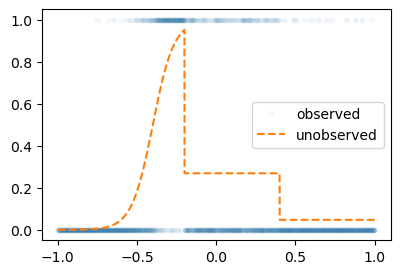

In [6]:
plt.plot(x,y,'.',alpha=0.03, label="observed")
plt.plot(x,v,'--', label="unobserved")
plt.legend()

🗣️ 뚝 떨어지는 부분은 어떻게 해야하지? 기울기를 급하게 근사하는 식으로 접근

In [7]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

🗣️ bias 여부가 직선의 개수에 영향을 주지는 X, (1,2)가 아니라 (1,512)로 하면 여러 번 꺾일 것임

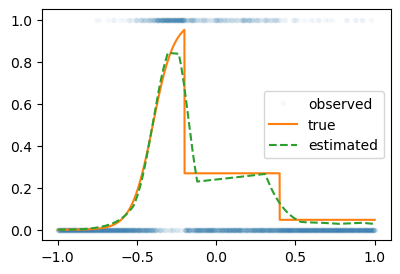

In [8]:
plt.plot(x,y,'.',alpha=0.03, label="observed")
plt.plot(x,v, label="true")
plt.plot(x,net(x).data,'--', label="estimated")
plt.legend()

🗣️ true는 관측할 수 없음, estimated는 true와 차이가 있어도 쓸만 함

🗣️(

- 과정 살펴보기

In [10]:
net

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=1, bias=True)
  (3): Sigmoid()
)

In [11]:
net[:1]

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
)

In [12]:
net[:3]

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=1, bias=True)
)

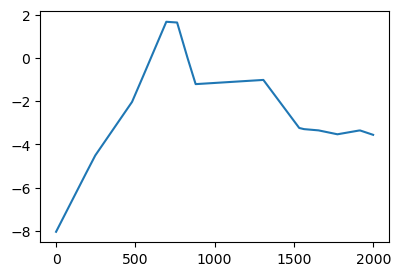

In [16]:
plt.plot(net[:3](x).data) # 꺾인 선

- 정답은 아니지만 적당히 근사적으로 쓸 수 있을 것 같음

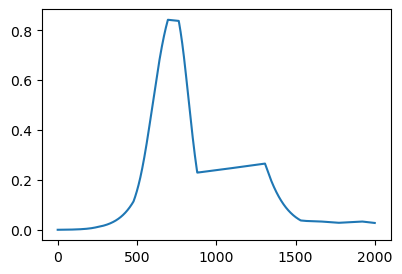

In [15]:
plt.plot(net[:4](x).data) # sigmoid 결과

)🗣️

`#`

## B. 곡선은 표현 불가능하지 않나?

`# 예제2` --  2024년 수능 미적30번 문제에 나온 곡선 

$$y_i = e^{-x_i} \times  |\cos(5x_i)| \times \sin(5x) + \epsilon_i, \quad \epsilon_i \sim N(0,\sigma^2)$$

In [17]:
torch.manual_seed(43052)
x = torch.linspace(0,2,2000).reshape(-1,1)
eps = torch.randn(2000).reshape(-1,1)*0.05
fx = torch.exp(-1*x)* torch.abs(torch.cos(3*x))*(torch.sin(3*x))
y = fx + eps

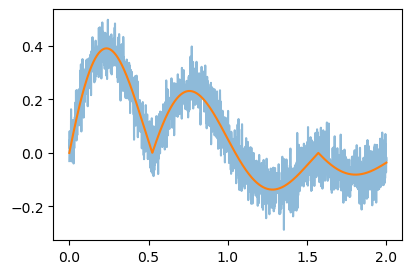

In [18]:
plt.plot(x,y,label="observed",alpha=0.5)
plt.plot(x,fx,label="true")

🗣️ 되게 세밀하게 많이 꺾으면 곡선은 아니지만 곡선처럼 보일 수 있을 것 같음 (이 상황에서 bias 여부는 의미 X)

🗣️(

- 굳이 0과 1 사이로 누를 필요도 없고 - 값도 갖고 있으므로 sigmoid 취할 필요는 없을듯
- y가 0 또는 1이 아니고 연속적인 어떤 값을 계속 가질 수 있음
    - 회귀랑 비슷하므로 MSELoss 사용
    - BCELoss를 여기서 사용한다면 이 경우 log에 음수가 들어갈 수도 있으므로 X 

In [19]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1024), # 꺽이지않은 1024개의 직선
    torch.nn.ReLU(), # 꺽인(렐루된) 1024개의 직선 
    torch.nn.Linear(1024,1), # 합쳐진 하나의 꺽인 직선 
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
## 
for epoc in range(1000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

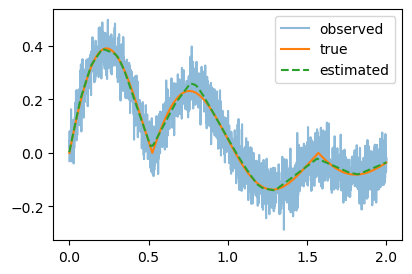

In [20]:
plt.plot(x,y,label="observed",alpha=0.5)
plt.plot(x,fx,label="true")
plt.plot(x,net(x).data,'--',label="estimated")
plt.legend()

- 잘 보면 직선 느낌이 있기는 하나 이 정도면 그럭저럭 괜찮음

)🗣️

In [21]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,2048), # 꺽이지않은 1024개의 직선
    torch.nn.ReLU(), # 꺽인(렐루된) 1024개의 직선 
    torch.nn.Linear(2048,1), # 합쳐진 하나의 꺽인 직선 
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
## 
for epoc in range(1000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

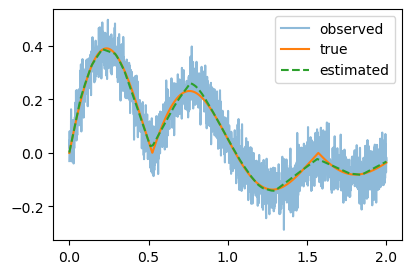

In [22]:
plt.plot(x,y,label="observed",alpha=0.5)
plt.plot(x,fx,label="true")
plt.plot(x,net(x).data,'--',label="estimated")
plt.legend()

`#`

# 4. 시벤코정리 📝 

🗣️ 이 정도면 괜찮다, 쓸만하다 같은 표현 말고 똑 떨어지는 표현이 없을까?

## A. 시벤코정리 소개

::: {.callout-note}
### Universal Approximation Thm [@cybenko1989approximation]

하나의 은닉층을 가지는 아래와 같은 꼴의 네트워크 $net: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$는

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(p,???),
    torch.nn.Sigmoid(),
    torch.nn.Linear(???,q)
)
```

모든 보렐 가측함수 (Borel measurable function) 

$$f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$$

를 원하는 정확도로 "근사"시킬 수 있다. 쉽게 말하면 ${\bf X} \to {\bf y}$ 인 어떠한 복잡한 규칙라도 하나의 은닉층을 가진 신경망이 원하는 정확도로 근사시킨다는 의미이다. 예를들면 아래와 같은 문제를 해결할 수 있다.

- ${\bf X}_{n\times 2}$는 토익점수, GPA 이고 ${\bf y}_{n\times 1}$는 취업여부일 경우 ${\bf X} \to {\bf y}$인 규칙을 신경망은 항상 찾을 수 있다.
- ${\bf X}_{n \times p}$는 주택이미지, 지역정보, 주택면적, 주택에 대한 설명 이고 ${\bf y}_{n\times 1}$는 주택가격일 경우 ${\bf X} \to {\bf y}$인 규칙을 신경망은 항상 찾을 수 있다.

즉 하나의 은닉층을 가진 신경망의 표현력은 거의 무한대라 볼 수 있다.
:::



- 🗣️
    - 시벤코가 Sigmoid로 증명했으나 ReLU를 넣어도 상관 X
    - x는 p의 차원을 갖고 y는 q의 차원을 가져도 됨 (같을 필요 X)
    - ???: 아무 숫자를 넣어도 상관없으나 2^n 으로 쓰는게 메모리에 효율적이라고 알려져 있음
    - 보렐가측함수: 일반인들이 상상할 수 있는 거의 모든 함수
    - 이미지와 텍스트도 숫자로 바꿀 수 있음 => X를 nxp로 정리 가능

> 보렐가측함수에 대한 정의는 측도론에 대한 이해가 있어야 가능함. 측도론에 대한 내용이 궁금하다면 <https://guebin.github.io/SS2024/> 을 공부해보세요

## B. 왜 가능한가??

`-` 준비

In [23]:
x = torch.linspace(-10,10,200).reshape(-1,1)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=2,out_features=1)
)
l1,a1,l2 = net

🗣️ 2개의 직선 -> 2개의 곡선(Sigmoid) -> 1개로 합침

In [24]:
net

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

🗣️(

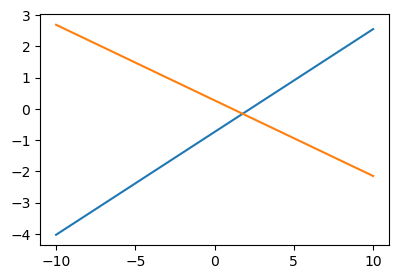

In [25]:
plt.plot(x, net[0](x).data)

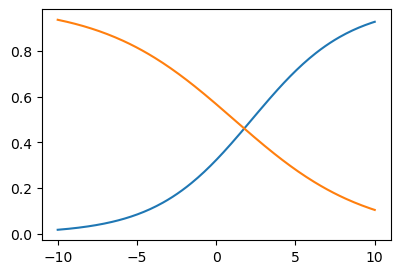

In [26]:
plt.plot(x, net[:2](x).data) # Sigmoid 까지

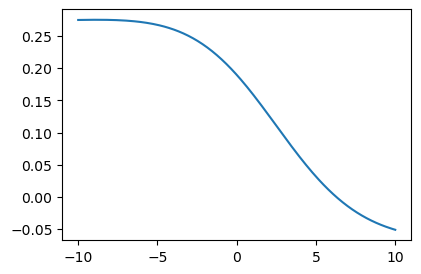

In [27]:
plt.plot(x, net[:3](x).data) # 합쳐서 하나의 Sigmoid

)🗣️

`# 생각1` -- 2개의 시그모이드를 우연히 잘 조합하면 하나의 계단함수를 만들 수 있다. 

🗣️ 숫자를 잘 때려맞추다보면..

In [28]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+10.00,+10.00])

In [29]:
l2.weight.data = torch.tensor([[1.00,1.00]])
l2.bias.data = torch.tensor([-1.00])

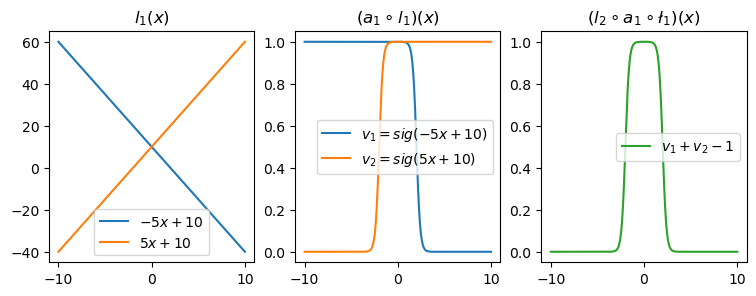

In [30]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x)[:,[0]].data,label=r"$-5x+10$")
ax[0].plot(x,l1(x)[:,[1]].data,label=r"$5x+10$")
ax[0].set_title('$l_1(x)$')
ax[0].legend()
ax[1].plot(x,a1(l1(x))[:,[0]].data,label=r"$v_1=sig(-5x+10)$")
ax[1].plot(x,a1(l1(x))[:,[1]].data,label=r"$v_2=sig(5x+10)$")
ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[1].legend()
ax[2].plot(x,l2(a1(l1(x))).data,color='C2',label=r"$v_1+v_2-1$")
ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$')
ax[2].legend()

`#`

`# 생각2` -- 계단함수의 모양이 꼭 생각1과 같을 필요는 없다. 중심은 이동가능하고, 높이도 조절가능하다. 

**가능한 예시1**

(-0.1, 2.6)

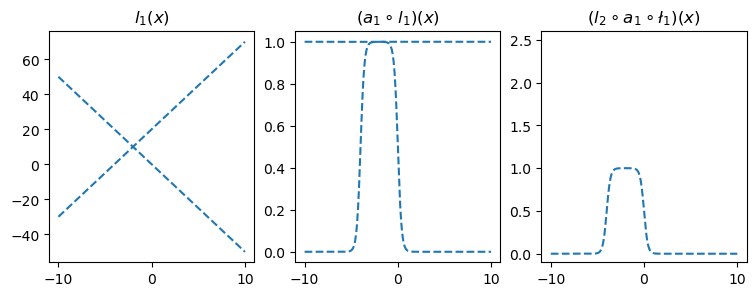

In [31]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+0.00,+20.00])
l2.weight.data = torch.tensor([[1.00,1.00]])
l2.bias.data = torch.tensor([-1.00])
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x).data.numpy(),'--',color='C0'); ax[0].set_title('$l_1(x)$')
ax[1].plot(x,a1(l1(x)).data.numpy(),'--',color='C0'); ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[2].plot(x,l2(a1(l1(x))).data,'--',color='C0'); ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$');
ax[2].set_ylim(-0.1,2.6)

**가능한 예시2**

(-0.1, 2.6)

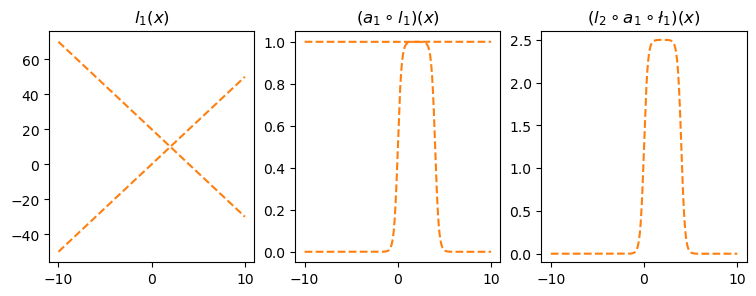

In [32]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+20.00,+00.00])
l2.weight.data = torch.tensor([[2.50,2.50]])
l2.bias.data = torch.tensor([-2.50])
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x).data.numpy(),'--',color='C1'); ax[0].set_title('$l_1(x)$')
ax[1].plot(x,a1(l1(x)).data.numpy(),'--',color='C1'); ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[2].plot(x,l2(a1(l1(x))).data,'--',color='C1'); ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$');
ax[2].set_ylim(-0.1,2.6)

`#`

`# 생각3`: 첫번째 선형변환(=$l_1$)에서 `out_features=4`로 하고 적당한 가중치를 조정하면 $(l_2\circ a_1 \circ l_1)(x)$의 결과로 생각2의 예시1,2를 조합한 형태도 가능할 것 같다. 즉 4개의 시그모이드를 잘 조합하면 2단계 계단함수를 만들 수 있다. 

In [33]:
l1 = torch.nn.Linear(in_features=1,out_features=4)
a1 = torch.nn.Sigmoid()
l2 = torch.nn.Linear(in_features=4,out_features=1)

In [34]:
l1.weight.data = torch.tensor([[-5.00],[5.00],[-5.00],[5.00]])
l1.bias.data = torch.tensor([0.00, 20.00, 20.00, 0])
l2.weight.data = torch.tensor([[1.00,  1.00, 2.50,  2.50]])
l2.bias.data = torch.tensor([-1.0-2.5])

🗣️ 숫자를 바꾸면 모양이 달라짐

Text(0.5, 1.0, '$(l_2 \\circ a_1 \\circ l_1)(x)$')

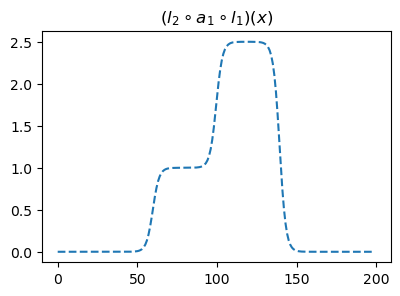

In [35]:
plt.plot(l2(a1(l1(x))).data,'--')
plt.title(r"$(l_2 \circ a_1 \circ l_1)(x)$")

> 이러한 함수는 계단모양이며, 0을 제외한 서로다른 계단의 높이는 2개가 된다. 이를 간단히 "2단계-계단함수"라고 칭하자.

`#`

`# 생각4` -- $2m$개의 시그모이드를 우연히 잘 조합하면 $m$단계 계단함수를 만들 수 있다. 

`-` 정리1: 2개의 시그모이드를 우연히 잘 결합하면 아래와 같은 "1단계-계단함수" 함수 $h$를 만들 수 있다.

🗣️(

In [36]:
sig = torch.nn.Sigmoid()

- 곱하는 숫자가 커질수록 급하게 올라감

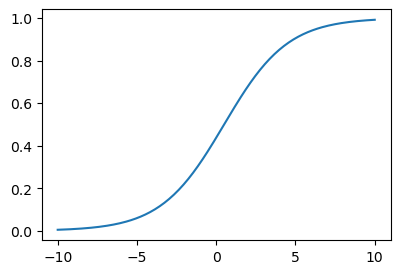

In [37]:
plt.plot(x, sig(0.5*(x-0.5)))

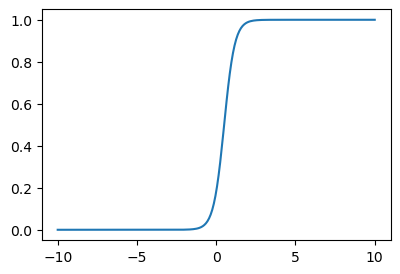

In [38]:
plt.plot(x, sig(3*(x-0.5)))

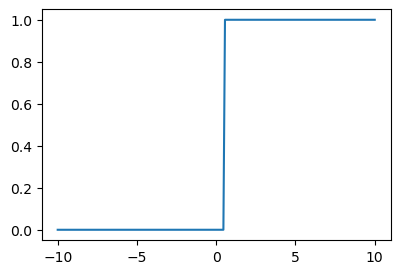

In [39]:
plt.plot(x, sig(200*(x-0.5)))

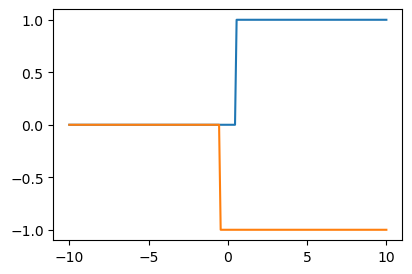

In [44]:
plt.plot(x, sig(200*(x-0.5)))
plt.plot(x, -sig(200*(x+0.5)))

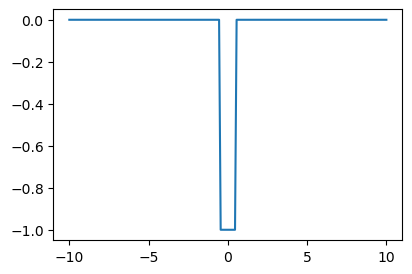

In [46]:
v1 = sig(200*(x-0.5))
v2 = -sig(200*(x+0.5))
plt.plot(x,v1+v2)

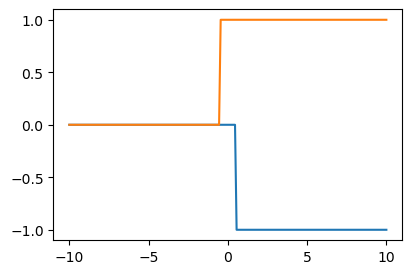

In [45]:
plt.plot(x, -sig(200*(x-0.5)))
plt.plot(x, sig(200*(x+0.5)))

)🗣️

In [47]:
def h(x):
    sig = torch.nn.Sigmoid()
    v1 = -sig(200*(x-0.5))
    v2 = sig(200*(x+0.5))
    return v1+v2 

Text(0.5, 1.0, '$h(x)$')

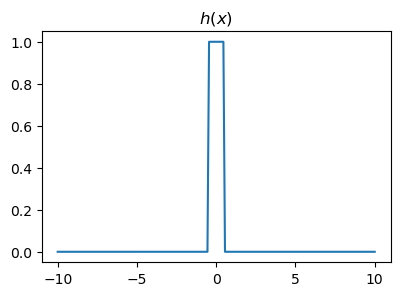

In [48]:
plt.plot(x,h(x))
plt.title("$h(x)$")

`-` 정리2: 위와 같은 함수 $h$를 이용한 아래의 네트워크를 고려하자. 이는 "m단계-계단함수"를 만든다. 

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{h}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$$

그리고 위의 네트워크와 동일한 효과를 주는 아래의 네트워크가 항상 존재함.

🗣️ 2개의 Sigmoid를 각각 취함

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2m)}{\boldsymbol u^{(1)}} \overset{sig}{\to} \underset{(n,2m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$$

`#`

`# 생각5` -- 그런데 어지간한 함수형태는 구불구불한 "m단계-계단함수"로 다 근사할 수 있지 않나?

그렇다면 아래의 네트워크에서 (1) ?? 를 충분히 키우고 (2) 적절하게 학습만 잘 된다면 

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(p,???),
    torch.nn.Sigmoid(),
    torch.nn.Linear(???,q)
)
```

위의 네트워크는 거의 무한한 표현력을 가진다. --> 이런식으로 증명하면 됩니당

`#`

## C. $h$의 위력

🗣️ Sigmoid 대신 h를 하고 싶음

`-` 소망: 아래와 같이 `net`을 설계해서, 그 위력을 체감해보고 싶은데.. 

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(1,??),
    torch.nn.H(),
    torch.nn.Linear(??,1)
)
```

`-` $h(x)$를 생성하는 클래스를 만들어보자.

🗣️ Module: 상속 / 잘 모르겠으면 다음을 templete으로 생각하고 외우기

```python
class H(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,x):
        # out = h(x)
        return out
```

🗣️(

In [50]:
class H(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,x):
        def h(x):
            sig = torch.nn.Sigmoid()
            v1 = -sig(200*(x-0.5))
            v2 = sig(200*(x+0.5))
            return v1+v2 
        out = h(x)
        return out 

In [51]:
my_h = H()

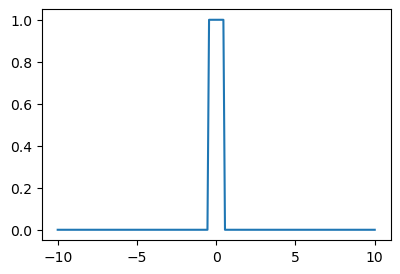

In [52]:
plt.plot(x, my_h(x))

)🗣️

In [53]:
class H(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,x):
        def h(x):
            sig = torch.nn.Sigmoid()
            v1 = -sig(200*(x-0.5))
            v2 = sig(200*(x+0.5))
            return v1+v2 
        out = h(x)
        return out 

In [54]:
h = H()

`-` $h$의 위력을 체감해보자. 

`# 예제1` -- 스펙의 역설 

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2025/main/posts/ironyofspec.csv")
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)
prob = torch.tensor(df.prob).float().reshape(-1,1)

🗣️(

- 다음을 적합시키려고 함

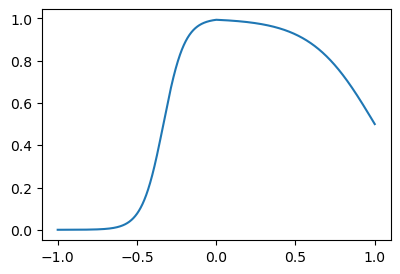

In [56]:
plt.plot(x,prob)

- network 만든 이전 방식

```python
net = torch.nn.Sequential(
    torch.nn.Linear(1,2,bias=False),
    torch.nn.ReLu(),
    torch.nn.Linear(2,1),
    torch.Sigmoid()
)
```

- 이제 이렇게 하지 않고 다음과 같이 하려고 함

)🗣️

In [57]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,2048),
    H(),
    torch.nn.Linear(2048,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(200):
    ## 1 
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

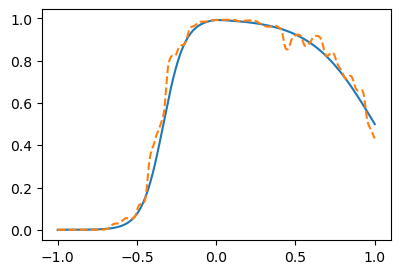

In [58]:
plt.plot(x,prob)
plt.plot(x,net(x).data,'--')

🗣️ 적합된 것을 보면 안 맞기는 하나 따라가고는 있음

`#`

`# 예제2` -- 수능곡선

In [59]:
torch.manual_seed(43052)
x = torch.linspace(0,2,2000).reshape(-1,1)
eps = torch.randn(2000).reshape(-1,1)*0.05
fx = torch.exp(-1*x)* torch.abs(torch.cos(3*x))*(torch.sin(3*x))
y = fx + eps

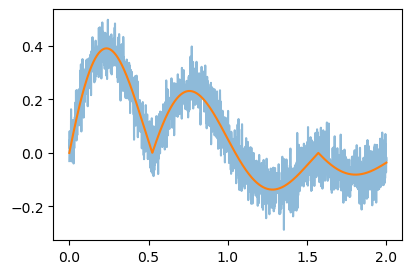

In [60]:
plt.plot(x,y,alpha=0.5)
plt.plot(x,fx)

In [61]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,2048),
    H(),
    torch.nn.Linear(2048,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(200):
    ## 1 
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()


🗣️ Sigmoid를 할 필요는 X

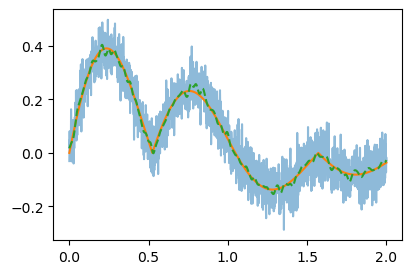

In [62]:
plt.plot(x,y,alpha=0.5)
plt.plot(x,fx)
plt.plot(x,net(x).data,'--')

`#`

## D. 의문점

🗣️ 반박은 다음 시간

`-` 이 수업을 잘 이해한 사람: 그냥 활성화함수를 $h$로 쓰면 끝 아니야? 뭐하러 relu 를 쓰는거지?

`-` 딥러닝을 좀 공부해본사람1: 왜 딥러닝이 2010년이 지나서야 떳지? 1989년에 세상의 모든 문제가 풀려야 하는것 아닌가?

`-` 딥러닝을 좀 공부해본사람2: 하나의 은닉층을 가진 네크워크는 잘 안쓰지 않나? 은닉층이 깊을수록 좋다고 들었는데?

`-` 약간의 의구심이 있지만 아무튼 우리는 아래의 무기를 가진 꼴이 되었다.

::: {.callout-tip}
### 우리의 무기

하나의 은닉층을 가지는 아래와 같은 꼴의 네트워크로,
```Python
net = torch.nn.Sequential(
    torch.nn.Linear(p,???),
    torch.nn.Sigmoid(),
    torch.nn.Linear(???,q)
)
```

$f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$ 인 모든 보렐 가측 함수 $f$ 을 원하는 정확도로 "근사"시킬 수 있다.
:::



# 5. MNIST 해결 📝

## A. 예비학습 -- `plt.imshow()`

`-` `plt.imshow(..., cmap="gray")` 에서 `...`이 shape이 (??,??)이면 흑백이미지를 출력

🗣️(

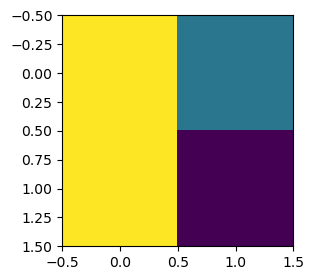

In [63]:
img = torch.tensor([[255,100],
                    [255,0]])
plt.imshow(img)

In [65]:
img.shape # 2x2 픽셀

torch.Size([2, 2])

)🗣️

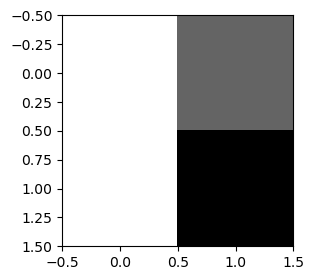

In [66]:
img = torch.tensor([[255,100],
                    [255,0]])
plt.imshow(img,cmap="gray")

🗣️ 숫자가 클수록 흰색, 작을수록 검정색

`-` `plt.imshow(...)` 에서 `...`의 shape이 (??,??,3)이면 칼라이미지를 출력

🗣️(

In [68]:
r = torch.tensor([[255,0],
                  [255,0]])
g = r*0
b = r*0
g

tensor([[0, 0],
        [0, 0]])

In [69]:
r.shape

torch.Size([2, 2])

In [70]:
torch.stack([r,g,b],axis=-1)

tensor([[[255,   0,   0],
         [  0,   0,   0]],

        [[255,   0,   0],
         [  0,   0,   0]]])

In [71]:
torch.stack([r,g,b],axis=-1).shape

torch.Size([2, 2, 3])

)🗣️

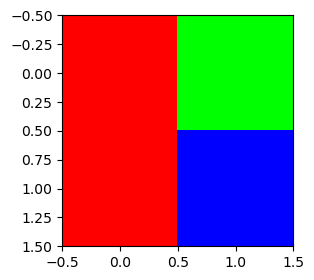

In [72]:
r = torch.tensor([[255,0],
                  [255,0]])
g = torch.tensor([[0,255],
                  [0,0]])
b = torch.tensor([[0,0],
                  [0,255]])
img = torch.stack([r,g,b],axis=-1)
plt.imshow(img)

🔬

In [73]:
img

tensor([[[255,   0,   0],
         [  0, 255,   0]],

        [[255,   0,   0],
         [  0,   0, 255]]])

`-` `plt.imshow(...)` 에서 `...`의 자료형이 int인지 float인지에 따라서 인식이 다름

🗣️ int: max를 255로 그림, float: max를 1로 그림

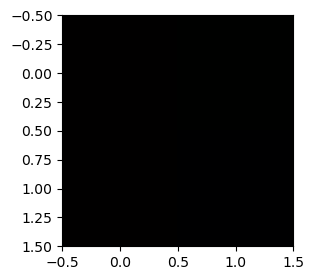

In [74]:
r = torch.tensor([[1,0],
                  [1,0]])
g = torch.tensor([[0,1],
                  [0,0]])
b = torch.tensor([[0,0],
                  [0,1]])
img = torch.stack([r,g,b],axis=-1)
plt.imshow(img)

In [75]:
img[0]

tensor([[1, 0, 0],
        [0, 1, 0]])

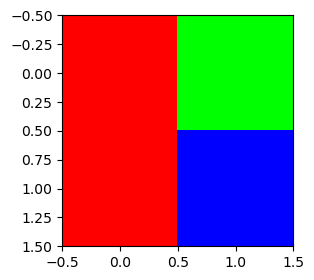

In [76]:
r = torch.tensor([[255,0],
                  [255,0]])/255
g = torch.tensor([[0,255],
                  [0,0]])/255
b = torch.tensor([[0,0],
                  [0,255]])/255
img = torch.stack([r,g,b],axis=-1)
plt.imshow(img)

In [77]:
img[0]

tensor([[1., 0., 0.],
        [0., 1., 0.]])

## B. 데이터

`-` 데이터 정리코드

In [78]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
to_tensor = torchvision.transforms.ToTensor()
X3 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==3])
X7 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==7])
X = torch.concat([X3,X7],axis=0)
y = torch.tensor([0.0]*len(X3) + [1.0]*len(X7))

100.0%
100.0%
100.0%
100.0%


🗣️(

In [79]:
X.shape # 4차원

torch.Size([12396, 1, 28, 28])

In [80]:
X[0].shape

torch.Size([1, 28, 28])

In [81]:
X[0][0].shape

torch.Size([28, 28])

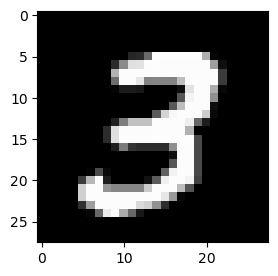

In [83]:
plt.imshow(X[0][0],cmap="gray")

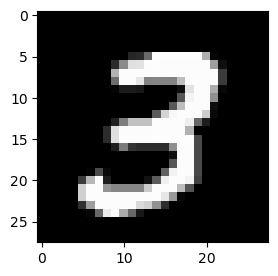

In [84]:
plt.imshow(X[0].reshape(28,28),cmap="gray")

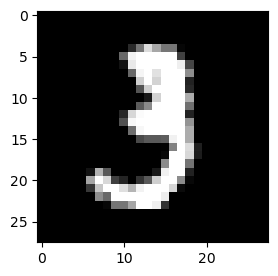

In [85]:
plt.imshow(X[1].reshape(28,28),cmap="gray")

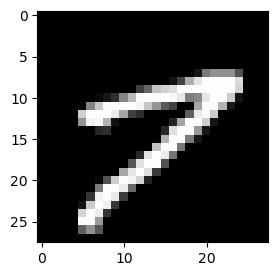

In [86]:
plt.imshow(X[-1].reshape(28,28),cmap="gray") # 끝에 있는 관측치

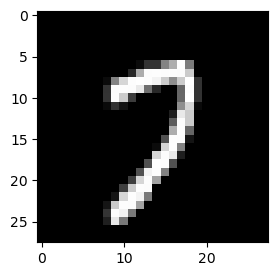

In [87]:
plt.imshow(X[-2].reshape(28,28),cmap="gray") # 끝에 있는 관측치

In [88]:
y

tensor([0., 0., 0.,  ..., 1., 1., 1.])

- 0은 3의 이미지, 1은 7의 이미지

In [89]:
len(y)

12396

)🗣️

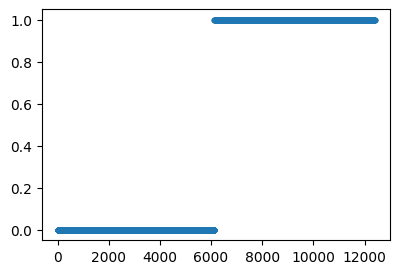

In [40]:
plt.plot(y,'.')

`-` 우리는 ${\bf X}: (n,1,28,28)$ 에서 ${\bf y}: (n,1)$으로 가는 맵핑을 배우고 싶음. $\to$ 이런건 배운적이 없는데?.. $\to$ 그렇다면 ${\bf X}:(n,784) \to {\bf y}:(n,1)$ 으로 가는 맵핑을 학습하자.

)🗣️

In [90]:
28*28

784

```python
[img for img in X] = [X[0], X[1], ..., X[-1]]
```

In [91]:
X[0].shape

torch.Size([1, 28, 28])

In [92]:
torch.stack([img.reshape(-1) for img in X])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [93]:
torch.stack([img.reshape(-1) for img in X]).shape

torch.Size([12396, 784])

In [95]:
y.shape # vector

torch.Size([12396])

)🗣️

In [96]:
X = torch.stack([img.reshape(-1) for img in X])
y = y.reshape(-1,1)

In [97]:
X.shape,y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

## C. 학습

🗣️ H가 더 좋은 것을 알고 있지만 사람들이 많이 쓰는 ReLU로

🗣️(

In [98]:
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    torch.nn.Sigmoid()
)

In [99]:
net(X)

tensor([[0.5066],
        [0.5152],
        [0.4821],
        ...,
        [0.5168],
        [0.5087],
        [0.5066]], grad_fn=<SigmoidBackward0>)

- y와 비슷한 형태로 출력되는 것이 중요

)🗣️

In [100]:
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(200):
    ## 1 
    yhat = net(X) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

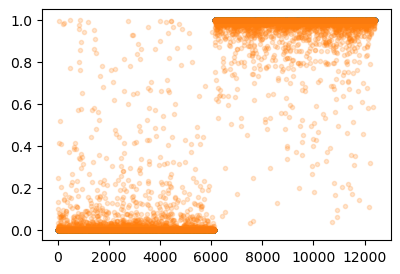

In [101]:
plt.plot(y,'.')
plt.plot(net(X).data,'.',alpha=0.2)

🗣️ 틀린 것도 있지만 맞은 것이 더 많음 (2,000번하면 더 많이 맞춤)

🗣️(Accuracy

- Rule 정하기

In [102]:
net(X).data > 0.5

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [103]:
(net(X).data > 0.5)*1.0

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])

In [104]:
y

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])

In [105]:
(y == (net(X).data > 0.5)*1.0)

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]])

In [106]:
(y == (net(X).data > 0.5)*1.0).sum()

tensor(12264)

In [107]:
len(y)

12396

In [108]:
12264/12396

0.989351403678606

In [110]:
((y == (net(X).data > 0.5))*1.0).mean()

tensor(0.9894)

)🗣️

In [111]:
((y == (net(X).data > 0.5))*1.0).mean()

tensor(0.9894)

:::{.callout-note}

**이미지자료의 차원**

- 칼라이미지데이터 ${\bf X}$는 (n,3,h,w) 의 차원을 가지거나 (n,h,w,3)의 차원을 가진다. 
- 흑백이미지데이터 ${\bf X}$는 (n,h,w) 의 차원을 가지거나 (n,1,h,w)의 차원을 가지거나 (n,h,w,1)의 차원을 가진다. 

:::